In [203]:
# imports
!pip install forex_python
from forex_python.converter import CurrencyRates

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import glob
import os

^C


In [ ]:
balance = glob.glob(os.path.join('balance', "*.csv"))
movement = glob.glob(os.path.join('movement', "*.csv"))

balance = pd.concat((pd.read_csv(f, parse_dates=['date'], dayfirst=True) for f in balance),
                     ignore_index=True
                     ).sort_values(by='date')#.set_index('date')

movement = pd.concat((pd.read_csv(f, parse_dates=['date'], dayfirst=True) for f in movement),
                      ignore_index=True
                      ).sort_values(by='date')#.set_index('date')


In [ ]:
#currency converter

c = CurrencyRates()

balance.rename({'amount':'amount_raw'}, axis= 1, inplace= True)

balance['amount'] = balance.apply( lambda x: c.convert( x.currency, 'USD', x.amount_raw, x.date), axis = 1)
balance['exchange rate'] = balance['amount_raw'] / balance['amount']

movement.rename({'amount':'amount_raw'}, axis= 1, inplace= True)

movement['amount'] = movement.apply( lambda x: c.convert( x.currency, 'USD', x.amount_raw, x.date), axis = 1)
movement['exchange rate'] = movement['amount_raw'] / movement['amount']

<ipython-input-163-9047cbcaa440>:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in balance.groupby(['name_1']):


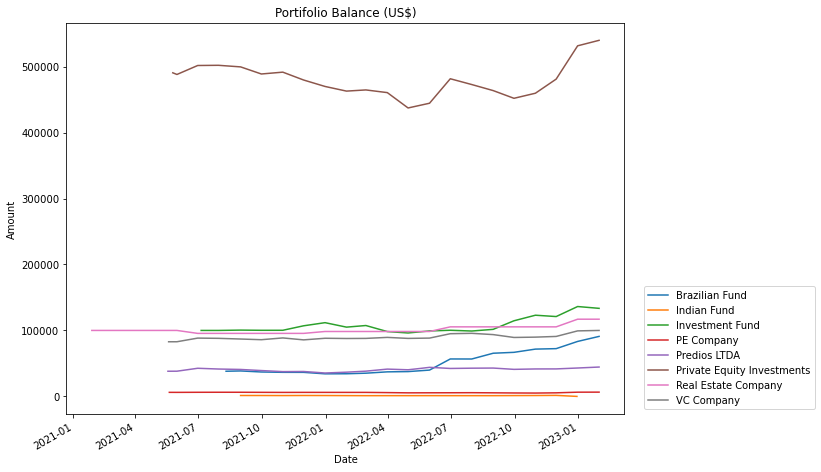

In [ ]:
#portifolio balance plot
fig, ax = plt.subplots(figsize=(10, 8))

#groupby asset type 
for key, grp in balance.groupby(['name_1']):
    ax = grp.plot(ax=ax, kind='line', x= 'date', y= 'amount', label=key)

plt.legend(bbox_to_anchor=(1.35, 0.34))
ax.set_title('Portifolio Balance (US$)')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.show()

<ipython-input-164-d78e3171709e>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in movement.groupby(['name_1']):


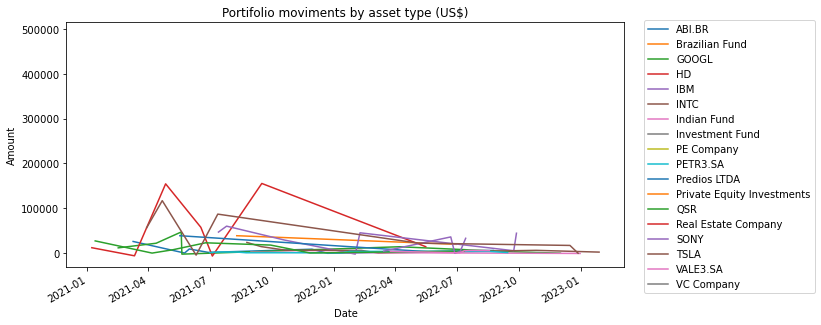

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

for key, grp in movement.groupby(['name_1']):
    ax = grp.plot(ax=ax, kind='line', x= 'date', y= 'amount', label=key)

plt.legend(bbox_to_anchor=(1.35, 1.03))
ax.set_title('Portifolio moviments by asset type (US$)')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.show()

<ipython-input-165-46cb8de352f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  movement_sum = movement.groupby(pd.Grouper(key='date', freq='M')).sum()['amount']


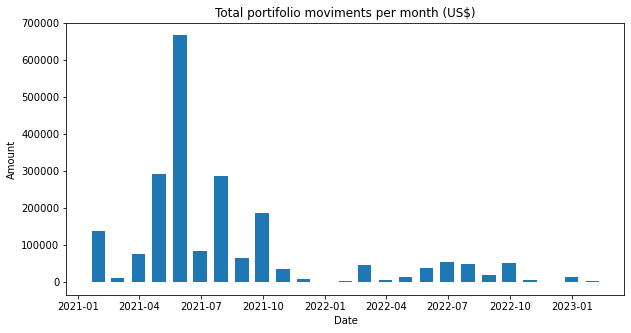

In [ ]:
movement_sum = movement.groupby(pd.Grouper(key='date', freq='M')).sum()['amount']

fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(movement_sum.index, movement_sum, width=20)

ax.set_title('Total portifolio moviments per month (US$)')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.show()


In [ ]:
movement.groupby(['event'])['amount'].sum()

event
Redemption     -3.408525e+04
Subscription    2.173969e+06
Name: amount, dtype: float64

Balance returns

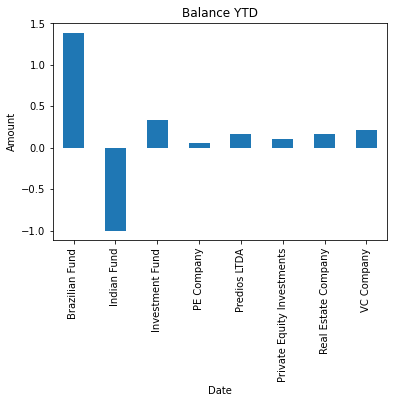

In [ ]:
balanace_var = (balance.groupby('name_1')['amount'].last()/balance.groupby('name_1')['amount'].first())-1

balanace_var.plot.bar()
plt.title('Balance YTD')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

In [ ]:
balance_final = balance.groupby('name_1')['amount'].last()

balance_final

name_1
Brazilian Fund                 90960.313198
Indian Fund                        0.000000
Investment Fund               133484.854700
PE Company                      6462.699643
Predios LTDA                   44508.532156
Private Equity Investments    539789.489232
Real Estate Company           117039.061300
VC Company                     99974.706436
Name: amount, dtype: float64

In [ ]:
balance_pivot = balance.pivot(index= 'date', columns=['name_1'], values='amount').ffill().reset_index()

In [ ]:
balance_pivot['total'] = balance_pivot[list(balance_pivot.drop('date', axis=1).columns)].sum(axis=1)

balance_pivot

name_1,date,Brazilian Fund,Indian Fund,Investment Fund,PE Company,Predios LTDA,Private Equity Investments,Real Estate Company,VC Company,total
0,2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,100000.00000,NaN,1.000000e+05
1,2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,100000.00000,NaN,1.000000e+05
2,2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,100000.00000,NaN,1.000000e+05
3,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,100000.00000,NaN,1.000000e+05
4,2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,100000.00000,NaN,1.000000e+05
5,2021-05-18,NaN,NaN,NaN,NaN,38143.091207,NaN,100000.00000,NaN,1.381431e+05
6,2021-05-19,NaN,NaN,NaN,NaN,38143.091207,NaN,100000.00000,82810.063064,2.209532e+05
7,2021-05-20,NaN,NaN,NaN,6149.687853,38143.091207,NaN,100000.00000,82810.063064,2.271028e+05
8,2021-05-25,NaN,NaN,NaN,6149.687853,38143.091207,490560.000000,100000.00000,82810.063064,7.176628e+05
9,2021-05-31,NaN,NaN,NaN,6110.075491,38206.926786,488040.000000,100000.00000,82847.830515,7.152048e+05


In [ ]:
balance_pivot.to_csv('balance_pivot.csv')

In [246]:
last = movement.groupby(['name_1'])['price'].last().dropna()

Movement metrics

In [249]:
summary = (movement
    .groupby(['name_1', 'currency'])
    .apply(
        lambda x: pd.Series([
            np.average(x['price'], weights=x['amount'])
        ], index=['Average Price'])
    )
    .reset_index()).dropna().sort_index().merge(last,on='name_1', how='outer')

In [253]:
summary

,name_1,currency,Average Price,price
0,ABI.BR,EUR,54.041367,52.2500
1,Brazilian Fund,BRL,995.890337,987.6047
2,GOOGL,USD,116.372258,100.9900
3,HD,USD,322.763073,295.9900
4,IBM,USD,136.490403,121.7400
5,INTC,USD,50.606864,28.1600
6,Indian Fund,INR,3422.018373,1281.1860
7,Investment Fund,USD,1000.000000,1000.0000
8,PETR3.SA,BRL,33.325623,34.6800
9,QSR,USD,63.351215,51.1100


In [251]:
summary.to_csv('avg_price.csv')

In [33]:
balance_final = pd.DataFrame(balance.groupby('name_1')['amount'].last()).reset_index()

balance_final

,name_1,amount
0,Brazilian Fund,464944.6527
1,Indian Fund,0.0000
2,Investment Fund,133484.8547
3,PE Company,842781.8504
4,Predios LTDA,227505.8572
5,Private Equity Investments,498282.5526
6,Real Estate Company,117039.0613
7,VC Company,134462.4271


In [55]:
balance_total = balance.groupby(['date', 'name_1'])['amount'].sum()

balance_total.to_csv('balance_total.csv')

In [ ]:
# exports

#   main
balance.to_csv('balance.csv')
movement.to_csv('movement.csv')

#   balance
balance_var.to_csv('balance_var.csv')
balance_pivot.to_csv('balance_pivot.csv')
balance_final.to_csv('balance_final.csv')

#   movement
avg_price.to_csv('avg_price.csv')